# Proyek Analisis Data: E-Commerce Public Dataset

-   **Nama:** Jordan Marcelino
-   **Email:** jhordan.marcelino@gmail.com
-   **ID Dicoding:** jordanmarz


## Menentukan Pertanyaan Bisnis


-   Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual ?
-   Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?
-   Pertanyaan 3: Di kota manakah order paling banyak dan paling sedikit dilakukan ?
-   Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?
-   Pertanyaan 5: Berapa lama order customer diterima oleh seller ?
-   Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?
-   Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?
-   Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?
-   Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?
-   Pertanyaan 10: Bagaimanakah demografi customer ?
-   Pertanyaan 11: Bagaimanakah demografi seller ?


## Import Semua Packages/Library yang Digunakan


In [220]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("dark")

## Data Wrangling


### Gathering Data

Menyimpan semua dataset dalam sebuah dictionary


In [221]:
list_df: dict[str, pd.DataFrame] = {}

for filename in os.listdir("data"):
    key = filename.split(".")[0]
    list_df[key] = pd.read_csv(f"data/{filename}")

In [222]:
list_df["customers_dataset"].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data


In [223]:
def asses_data(df: pd.DataFrame) -> None:
    """
    Fungsi untuk mengecek apakah terdapat missing values & data duplikat pada dataset
    """
    print(df.info())
    print(df.isna().sum())

    print(f"Terdapat data duplikat sebanyak: {df.duplicated().sum()}")

In [224]:
asses_data(list_df["customers_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [225]:
asses_data(list_df["geolocation_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Terdapat data duplikat sebanyak: 261831


In [226]:
asses_data(list_df["order_items_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [227]:
asses_data(list_df["order_payments_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [228]:
asses_data(list_df["order_reviews_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [229]:
asses_data(list_df["orders_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date

In [230]:
asses_data(list_df["product_category_name_translation"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
product_category_name            0
product_category_name_english    0
dtype: int64
Terdapat data duplikat sebanyak: 0


In [231]:
asses_data(list_df["products_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
prod

In [232]:
asses_data(list_df["sellers_dataset"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Terdapat data duplikat sebanyak: 0


### Cleaning Data

Berdasarkan proses assesing data, terdapat 4 dataset yang perlu dilakukan proses cleaning yaitu;

1. geolocation_dataset
2. orders_review_dataset
3. orders_dataset
4. products_dataset


### Proses cleaning data pada geolocation_dataset

-   Menghapus data duplikat


In [233]:
list_df["geolocation_dataset"] = list_df["geolocation_dataset"].drop_duplicates()

list_df["geolocation_dataset"].duplicated().sum()

0

### Proses cleaning data pada orders_review_dataset

-   Mengatasi missing values dengan mengisinya menggunakan string kosong (''), karena kemungkinan besar user memang tidak memberikan review komen, namun tetap memberikan rating


In [234]:
list_df["order_reviews_dataset"] = list_df["order_reviews_dataset"].fillna("")

list_df["order_reviews_dataset"].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Proses cleaning data pada orders_dataset

-   Mengatasi missing values pada kolom dengan membuang datanya, karena kita tidak bisa mengambil informasi yang berharga dari order yang dicancel, belum dikirim, atau pun belum sampai.


In [235]:
list_df["orders_dataset"][list_df["orders_dataset"].isna().any(axis=1)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [236]:
list_df["orders_dataset"] = list_df["orders_dataset"].dropna()
list_df["orders_dataset"].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Proses cleaning data pada products_dataset

-   Mengatasi missing values dengan membuang datanya, karena kita tidak memiliki informasi yang cukup untuk mengisi missing values, dan jika dilakukan imputasi hanya akan menyebabkan missleading


In [237]:
list_df["products_dataset"][list_df["products_dataset"].isna().any(axis=1)].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [238]:
list_df["products_dataset"] = list_df["products_dataset"].dropna()
list_df["products_dataset"].isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)


Karena satu zipcode bisa terdapat banyak lat dan long, maka dapat diatasi dengan cara mengambil satu perwakilan lat dan long untuk satu zipcode


In [239]:
geolocation_unique = (
    list_df["geolocation_dataset"]
    .groupby("geolocation_zip_code_prefix")
    .first()
    .reset_index()
)

geolocation_unique.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.549292,-46.633559,sao paulo,SP
1,1002,-23.548318,-46.635421,sao paulo,SP
2,1003,-23.549032,-46.635313,sao paulo,SP


### Menggabungkan dataset customers dan orders


In [240]:
order_items_payments = pd.merge(
    list_df["order_items_dataset"], list_df["order_payments_dataset"], on="order_id"
)
order_items_payments_reviews = pd.merge(
    order_items_payments, list_df["order_reviews_dataset"], on="order_id"
)

all_orders = pd.merge(
    list_df["orders_dataset"], order_items_payments_reviews, on="order_id"
)
orders_products = pd.merge(all_orders, list_df["products_dataset"], on="product_id")

customers_orders = pd.merge(
    list_df["customers_dataset"], orders_products, on="customer_id"
)

In [241]:
customers_orders = customers_orders[
    customers_orders["order_delivered_customer_date"]
    > customers_orders["order_delivered_carrier_date"]
]


In [242]:
customers_orders.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-30 00:00:00,2018-02-10 22:43:29,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 00:00:00,2018-06-15 12:10:59,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0


In [243]:
customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113148 entries, 0 to 113215
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113148 non-null  object 
 1   customer_unique_id             113148 non-null  object 
 2   customer_zip_code_prefix       113148 non-null  int64  
 3   customer_city                  113148 non-null  object 
 4   customer_state                 113148 non-null  object 
 5   order_id                       113148 non-null  object 
 6   order_status                   113148 non-null  object 
 7   order_purchase_timestamp       113148 non-null  object 
 8   order_approved_at              113148 non-null  object 
 9   order_delivered_carrier_date   113148 non-null  object 
 10  order_delivered_customer_date  113148 non-null  object 
 11  order_estimated_delivery_date  113148 non-null  object 
 12  order_item_id                 

In [244]:
customers_orders.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,113148.0,35086.918876,29867.653134,1003.00,11310.00,24315.00,58868.7500,99980.00
order_item_id,113148.0,1.194692,0.686937,1.00,1.00,1.00,1.0000,21.00
price,113148.0,119.888436,181.172068,0.85,39.90,74.90,133.0000,6735.00
freight_value,113148.0,20.004732,15.712685,0.00,13.08,16.32,21.1900,409.68
payment_sequential,113148.0,1.090704,0.686564,1.00,1.00,1.00,1.0000,26.00
payment_installments,113148.0,2.943004,2.778852,0.00,1.00,2.00,4.0000,24.00
payment_value,113148.0,171.575046,264.288675,0.00,60.85,107.94,189.0825,13664.08
review_score,113148.0,4.082989,1.345634,1.00,4.00,5.00,5.0000,5.00
product_name_lenght,113148.0,48.803841,10.015525,5.00,42.00,52.00,57.0000,76.00
product_description_lenght,113148.0,784.807067,650.317505,4.00,346.00,600.00,982.0000,3992.00


### Mengubah tipe data kolom yang memiliki value date menjadi datetime


In [245]:
date_columns = [
    "shipping_limit_date",
    "review_creation_date",
    "review_answer_timestamp",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

In [246]:
for column in date_columns:
    customers_orders[column] = pd.to_datetime(customers_orders[column])

customers_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113148 entries, 0 to 113215
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    113148 non-null  object        
 1   customer_unique_id             113148 non-null  object        
 2   customer_zip_code_prefix       113148 non-null  int64         
 3   customer_city                  113148 non-null  object        
 4   customer_state                 113148 non-null  object        
 5   order_id                       113148 non-null  object        
 6   order_status                   113148 non-null  object        
 7   order_purchase_timestamp       113148 non-null  datetime64[ns]
 8   order_approved_at              113148 non-null  datetime64[ns]
 9   order_delivered_carrier_date   113148 non-null  datetime64[ns]
 10  order_delivered_customer_date  113148 non-null  datetime64[ns]
 11  

### Menambahkan kolom baru yang dapat menambahkan informasi

-   orders_delivery_time = berapa lama pengiriman order
-   order_received_hours = berapa lama order diterima seller dalam satuan waktu jam
-   order_received_minutes = berapa lama order diterima seller dalam satuan waktu menit
-   reviewed_answered_hour = berapa lama review user dibalas seller dalam satuan jam
-   orders_days = pada hari apakah order dilakukan
-   orders_weekend = apakah order dilakukan pada weekend atau tidak
-   orders_months = pada bulan apakah order dilakukan


In [247]:
orders_delivery_time = (
    customers_orders["order_delivered_customer_date"]
    - customers_orders["order_delivered_carrier_date"]
).dt.days

In [248]:
orders_received_hours = (
    customers_orders["order_approved_at"] - customers_orders["order_purchase_timestamp"]
).dt.total_seconds() // 3600
orders_received_minutes = (
    (
        customers_orders["order_approved_at"]
        - customers_orders["order_purchase_timestamp"]
    ).dt.total_seconds()
    % 3600
) // 60

In [249]:
reviews_answered_hours = (
    customers_orders["review_answer_timestamp"]
    - customers_orders["review_creation_date"]
).dt.total_seconds() // 3600

In [250]:
orders_days = customers_orders["order_purchase_timestamp"].dt.day_name()
orders_weekend = customers_orders["order_purchase_timestamp"].dt.weekday.apply(
    lambda day: True if day in [5, 6] else False
)
orders_months = customers_orders["order_purchase_timestamp"].dt.month_name()

In [251]:
customers_orders["orders_delivery_time"] = orders_delivery_time
customers_orders["orders_received_hours"] = orders_received_hours
customers_orders["orders_received_minutes"] = orders_received_minutes
customers_orders["reviews_answered_hours"] = reviews_answered_hours
customers_orders["orders_day"] = orders_days
customers_orders["orders_weekend"] = orders_weekend
customers_orders["orders_month"] = orders_months

### Mengabungkan seluruh dataset menjadi satu dan menyimpan hasil akhir


In [252]:
customers_sellers = pd.merge(
    customers_orders, list_df["sellers_dataset"], on="seller_id"
)
all_df = pd.merge(
    customers_sellers,
    list_df["product_category_name_translation"],
    on="product_category_name",
)

In [253]:
all_df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,orders_received_hours,orders_received_minutes,reviews_answered_hours,orders_day,orders_weekend,orders_month,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,0.0,16.0,118.0,Tuesday,False,May,8577,itaquaquecetuba,SP,office_furniture
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,24.0,11.0,12.0,Saturday,True,May,8577,itaquaquecetuba,SP,office_furniture
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,22.0,114.0,Tuesday,False,March,8577,itaquaquecetuba,SP,office_furniture


In [254]:
all_df.to_csv("data/final.csv", index=False)
geolocation_unique.to_csv("data/geolocation_final.csv", index=False)

-   Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual ?
-   Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?
-   Pertanyaan 3: Di kota manakah order paling banyak dan paling sedikit dilakukan ?
-   Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?
-   Pertanyaan 5: Berapa lama order customer diterima oleh seller ?
-   Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?
-   Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?
-   Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?
-   Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?
-   Pertanyaan 10: Bagaimanakah demografi customer ?
-   Pertanyaan 11: Bagaimanakah demografi seller ?


## Visualization & Explanatory Analysis


### Pertanyaan 1: Produk apakah yang paling banyak terjual dan paling sedikit terjual


In [255]:
top_products_sales = (
    all_df.groupby("product_category_name_english")
    .agg({"order_id": "nunique"})
    .sort_values(by="order_id", ascending=False)
    .reset_index()
    .rename(
        columns={
            "order_id": "order_count",
            "product_category_name_english": "product_name",
        }
    )
)

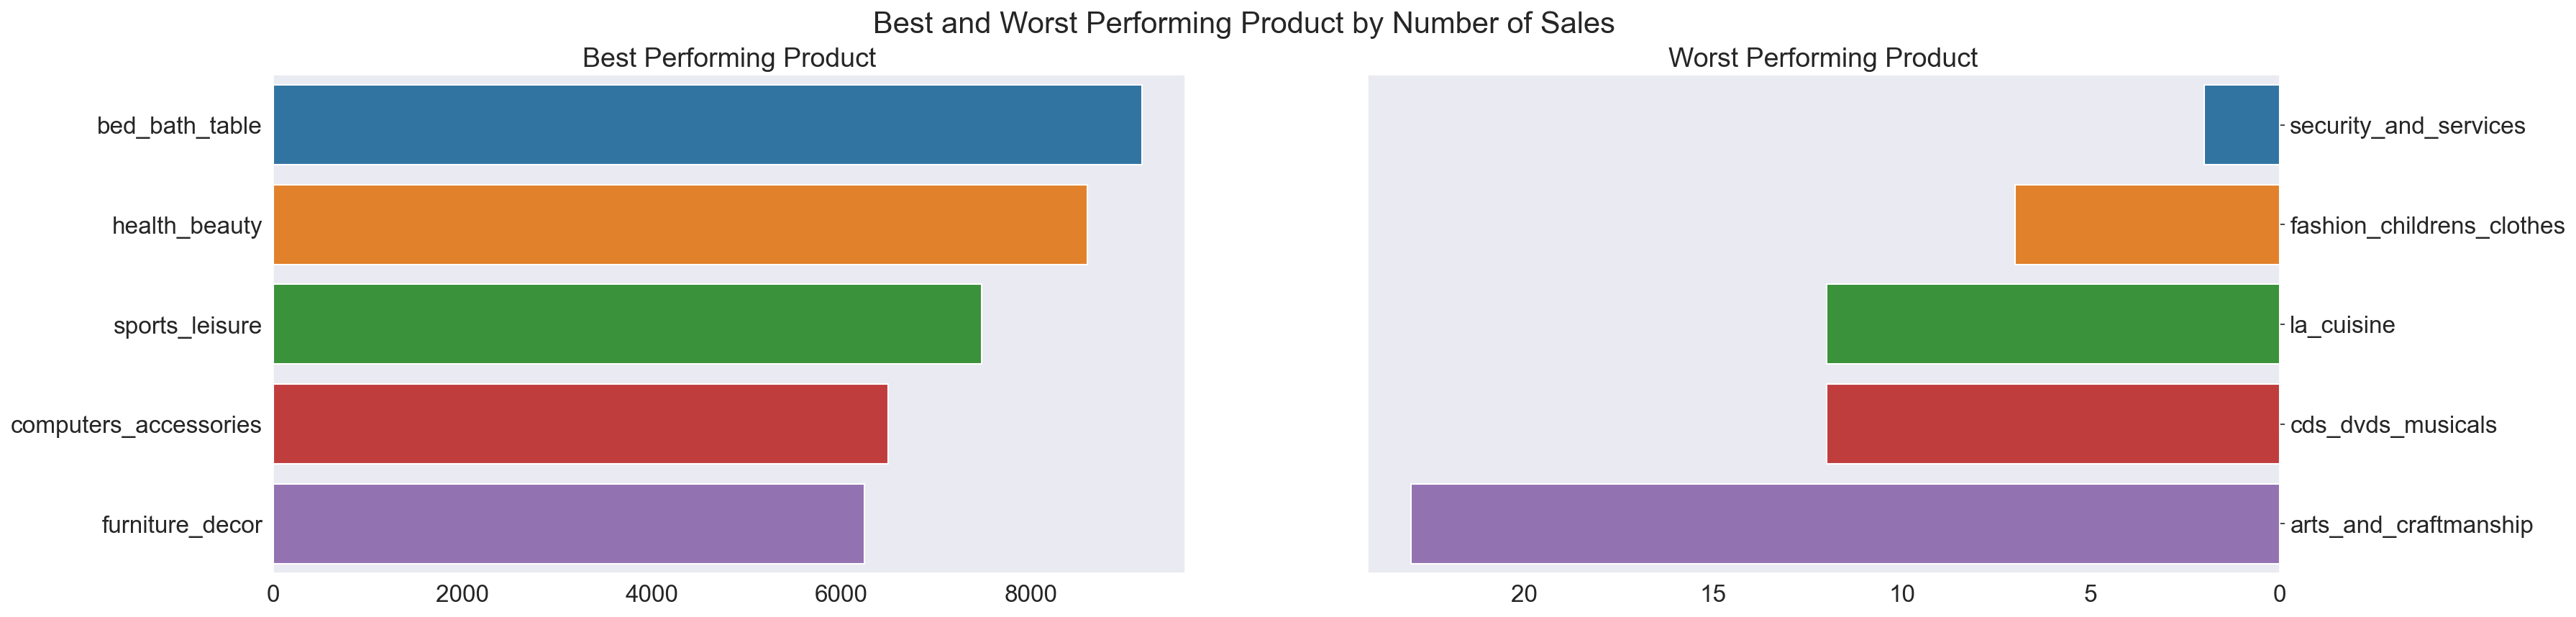

In [256]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="order_count", y="product_name", data=top_products_sales.head(), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=16)

sns.barplot(
    x="order_count",
    y="product_name",
    data=top_products_sales.sort_values(by="order_count", ascending=True).head(),
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=16)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)

### Pertanyaan 2: Produk apakah yang memiliki rating terbesar dan terkecil ?


In [257]:
top_products_reviews = (
    all_df.groupby("product_category_name_english")
    .agg({"review_score": "mean"})
    .sort_values(by="review_score", ascending=False)
    .reset_index()
    .rename(
        columns={
            "review_score": "rating",
            "product_category_name_english": "product_name",
        }
    )
)

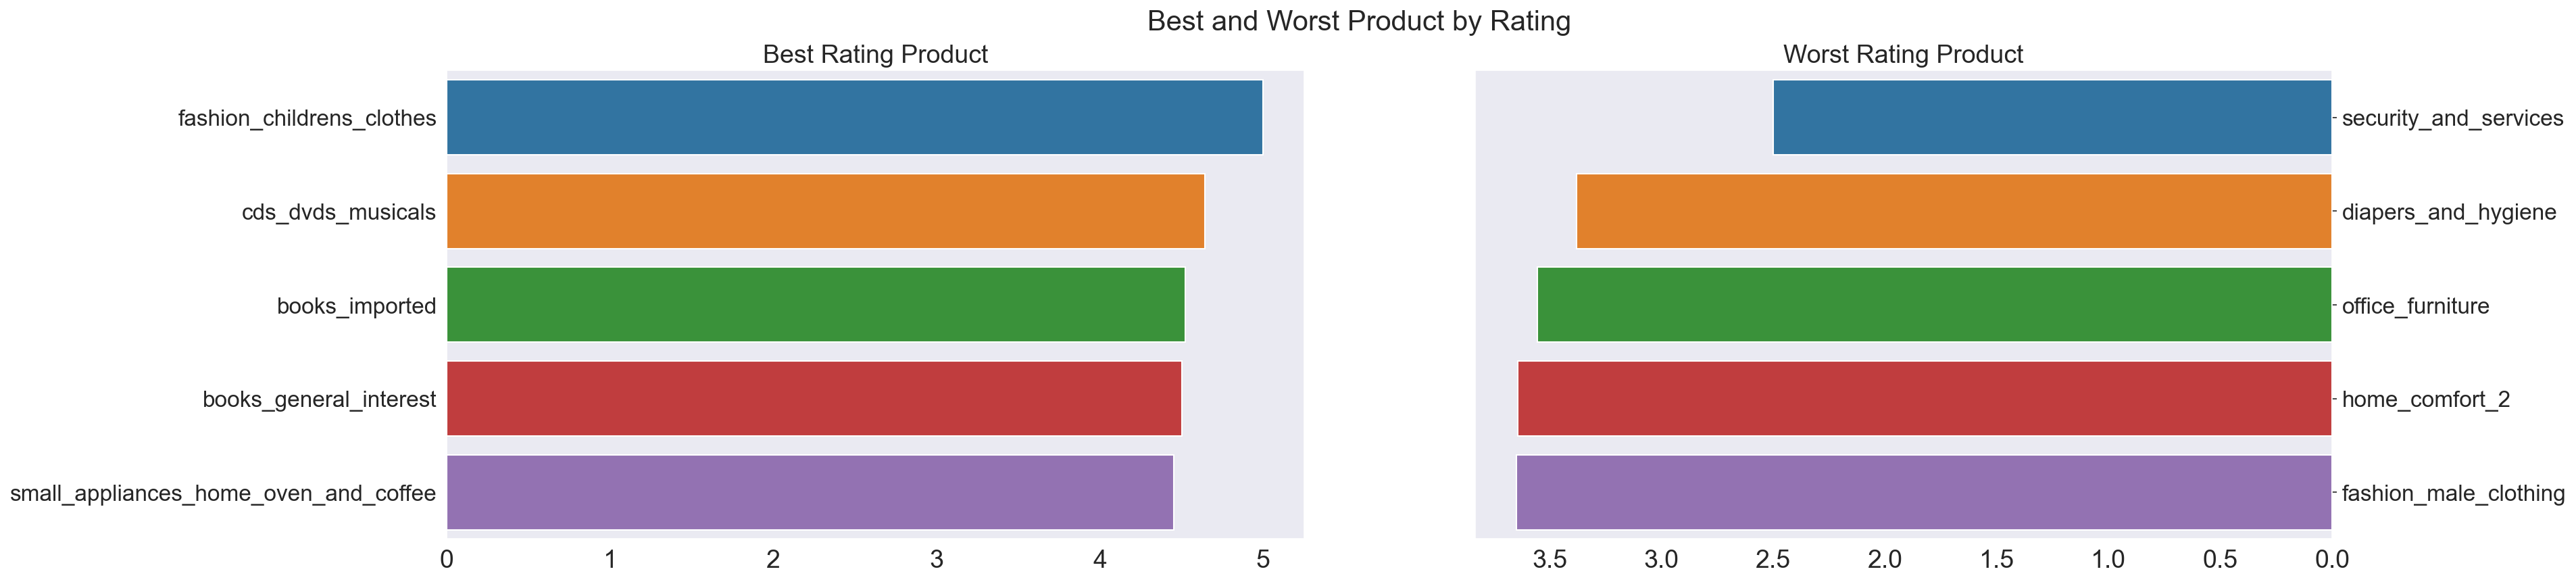

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="rating", y="product_name", data=top_products_reviews.head(), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Rating Product", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="rating",
    y="product_name",
    data=top_products_reviews.sort_values(by="rating", ascending=True).head(),
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Rating Product", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Best and Worst Product by Rating", fontsize=20)

### Pertanyaan 3: Di kota manakah order paling banyak dan paling sedikit dilakukan ?


In [259]:
orders_city = (
    all_df.groupby(["customer_city"])
    .agg({"order_id": "nunique"})
    .sort_values(by="order_id", ascending=False)
    .reset_index()
    .rename(
        columns={
            "order_id": "order_count",
        }
    )
)

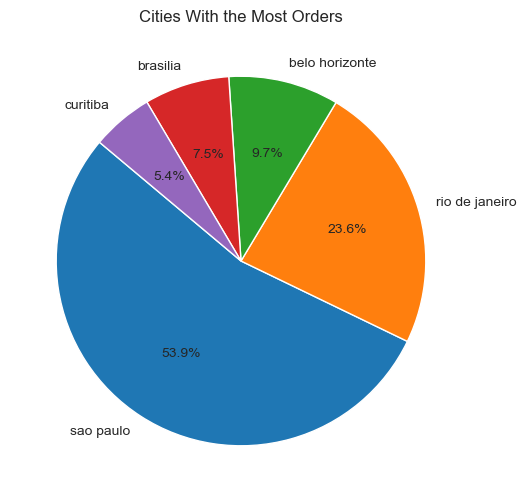

In [260]:
plt.figure(figsize=(25, 6))
plt.title("Cities With the Most Orders")
plt.pie(
    orders_city.head()["order_count"],
    labels=orders_city.head()["customer_city"],
    autopct="%1.1f%%",
    startangle=140,
)

### Pertanyaan 4: Bagaimana revenue penjualan seller berdasarkan kota ?


In [261]:
seller_revenue = (
    all_df.groupby(["seller_city"])
    .agg({"price": "sum"})
    .sort_values(by="price", ascending=False)
    .reset_index()
)


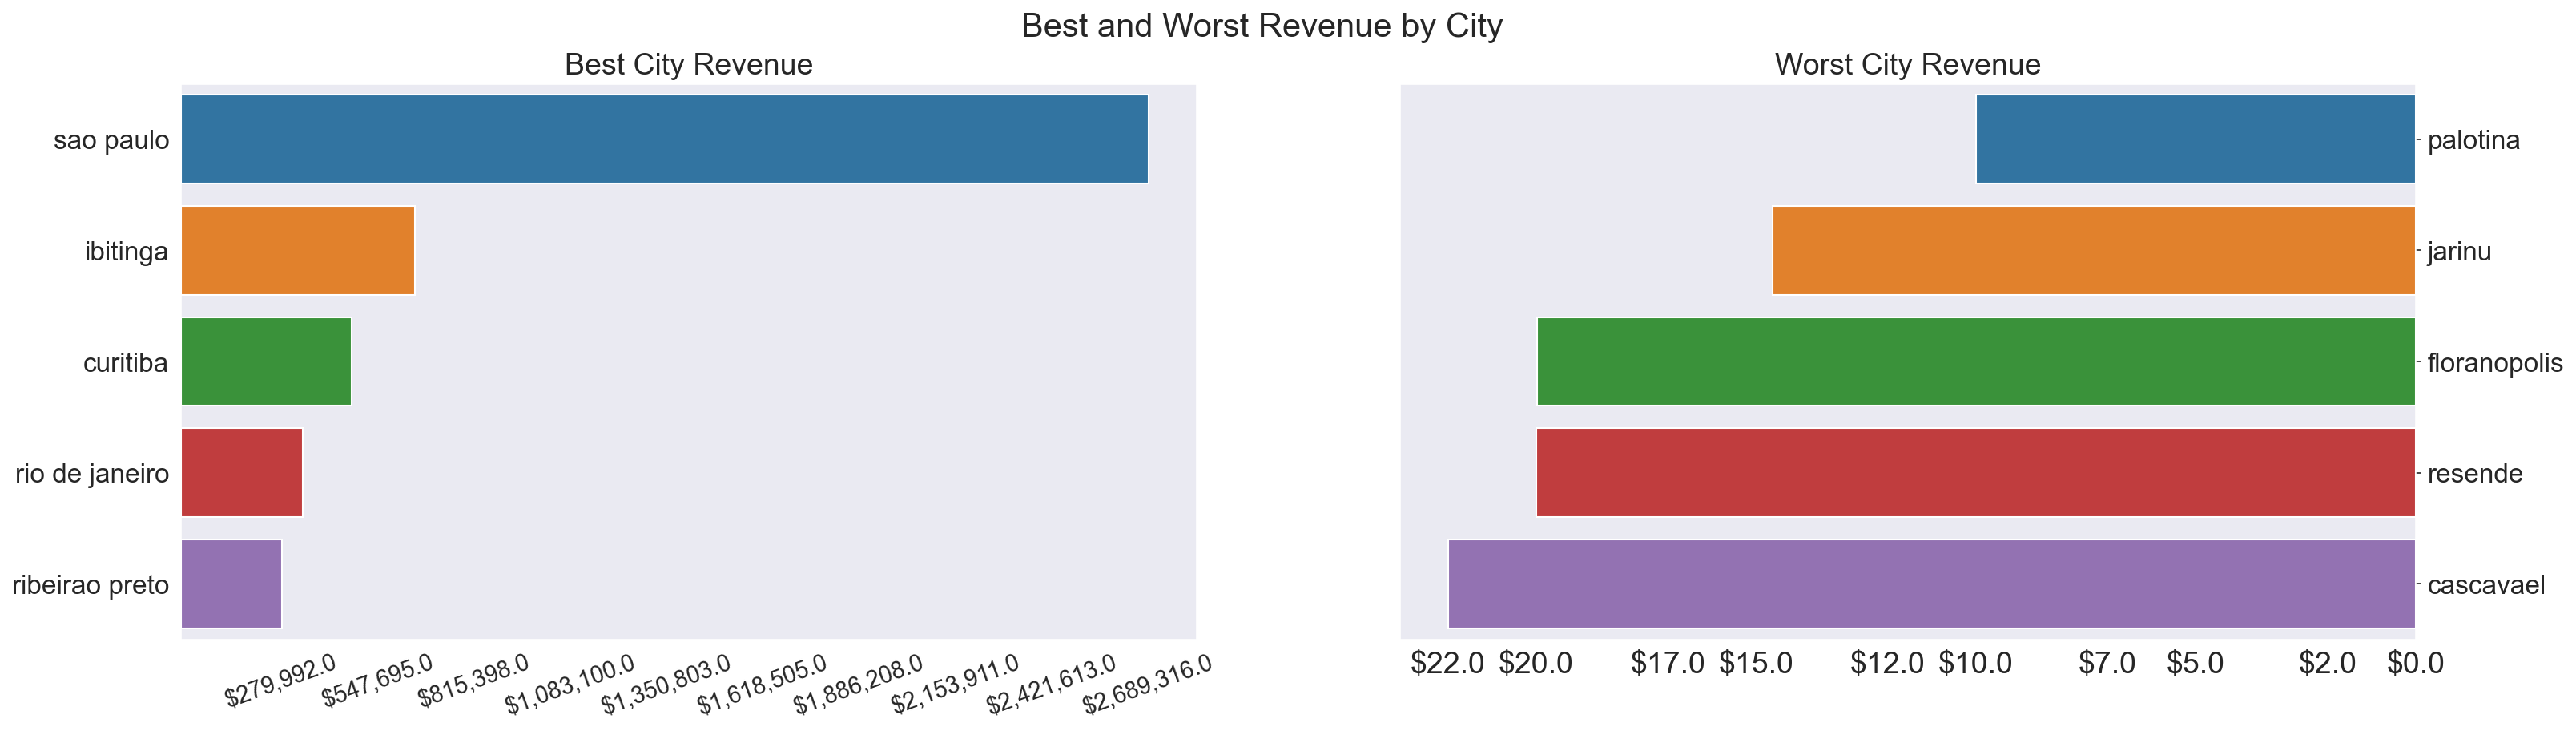

In [262]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

xticks = np.linspace(
    seller_revenue.head()["price"].min(), seller_revenue.head()["price"].max(), 10
).round()
sns.barplot(x="price", y="seller_city", data=seller_revenue.head(), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best City Revenue", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=14)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels([f"${revenue:,}" for revenue in xticks], rotation=20)

worst_sales = seller_revenue.sort_values(by="price", ascending=True).head()
xticks = np.linspace(0, worst_sales.head()["price"].max(), 10).round()
sns.barplot(
    x="price",
    y="seller_city",
    data=worst_sales,
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst City Revenue", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels([f"${revenue:,}" for revenue in xticks])

plt.suptitle("Best and Worst Revenue by City", fontsize=20)

### Pertanyaan 5: Berapa lama order customer diterima oleh seller ?


In [263]:
orders_approved = (
    all_df.groupby(["orders_received_hours", "orders_received_minutes"])
    .agg({"order_id": "nunique"})
    .sort_values("order_id", ascending=False)
    .reset_index()
)
orders_approved["label"] = orders_approved.apply(
    lambda row: f"{int(row['orders_received_hours'])}h {int(row['orders_received_minutes'])}m",
    axis=1,
)

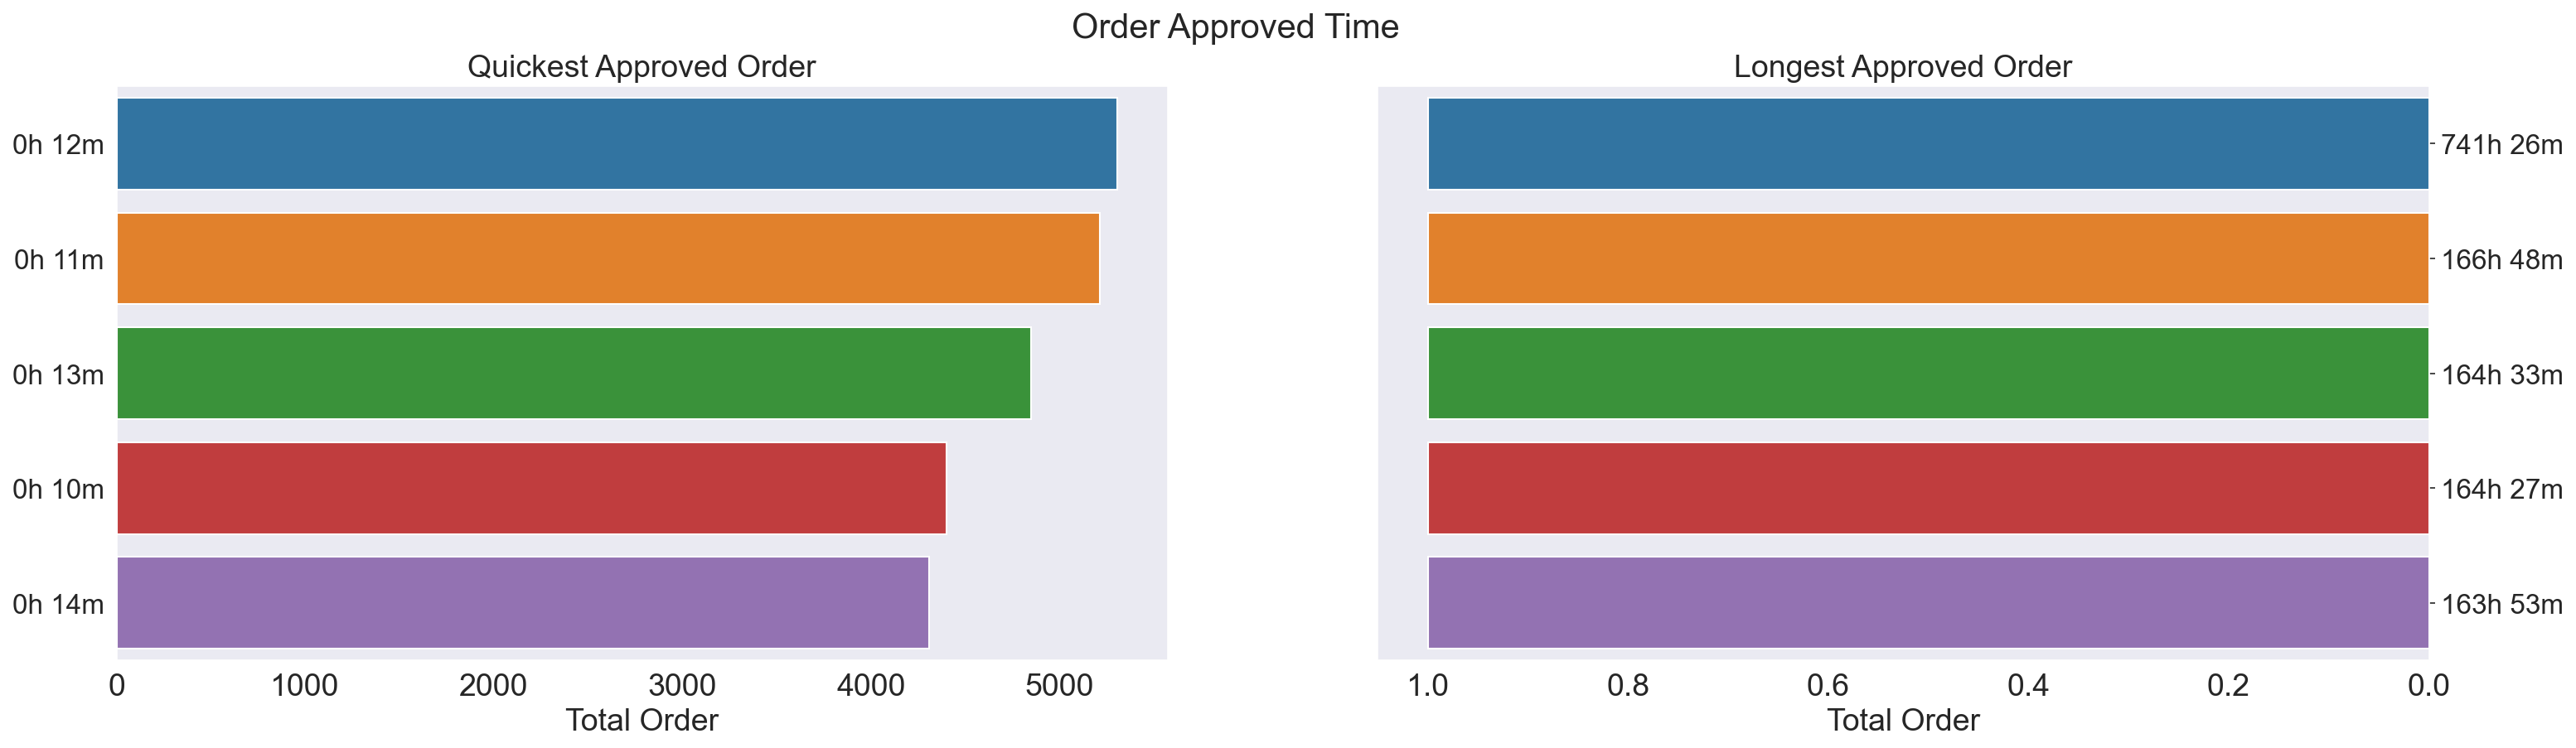

In [264]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="order_id", y="label", data=orders_approved.head(), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Order", fontsize=18)
ax[0].set_title("Quickest Approved Order", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="label",
    data=orders_approved.sort_values(by="order_id", ascending=True).head(),
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Order", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Longest Approved Order", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Order Approved Time", fontsize=20)

### Pertanyaan 6: Berapa lama pengiriman barang sampai diterima customer ?


In [275]:
delivery_time = (
    all_df.groupby("orders_delivery_time")
    .agg({"order_id": "nunique"})
    .reset_index()
    .sort_values("orders_delivery_time")
)
delivery_time["label"] = delivery_time.apply(
    lambda rows: f"{int(rows['orders_delivery_time'])} days", axis=1
)

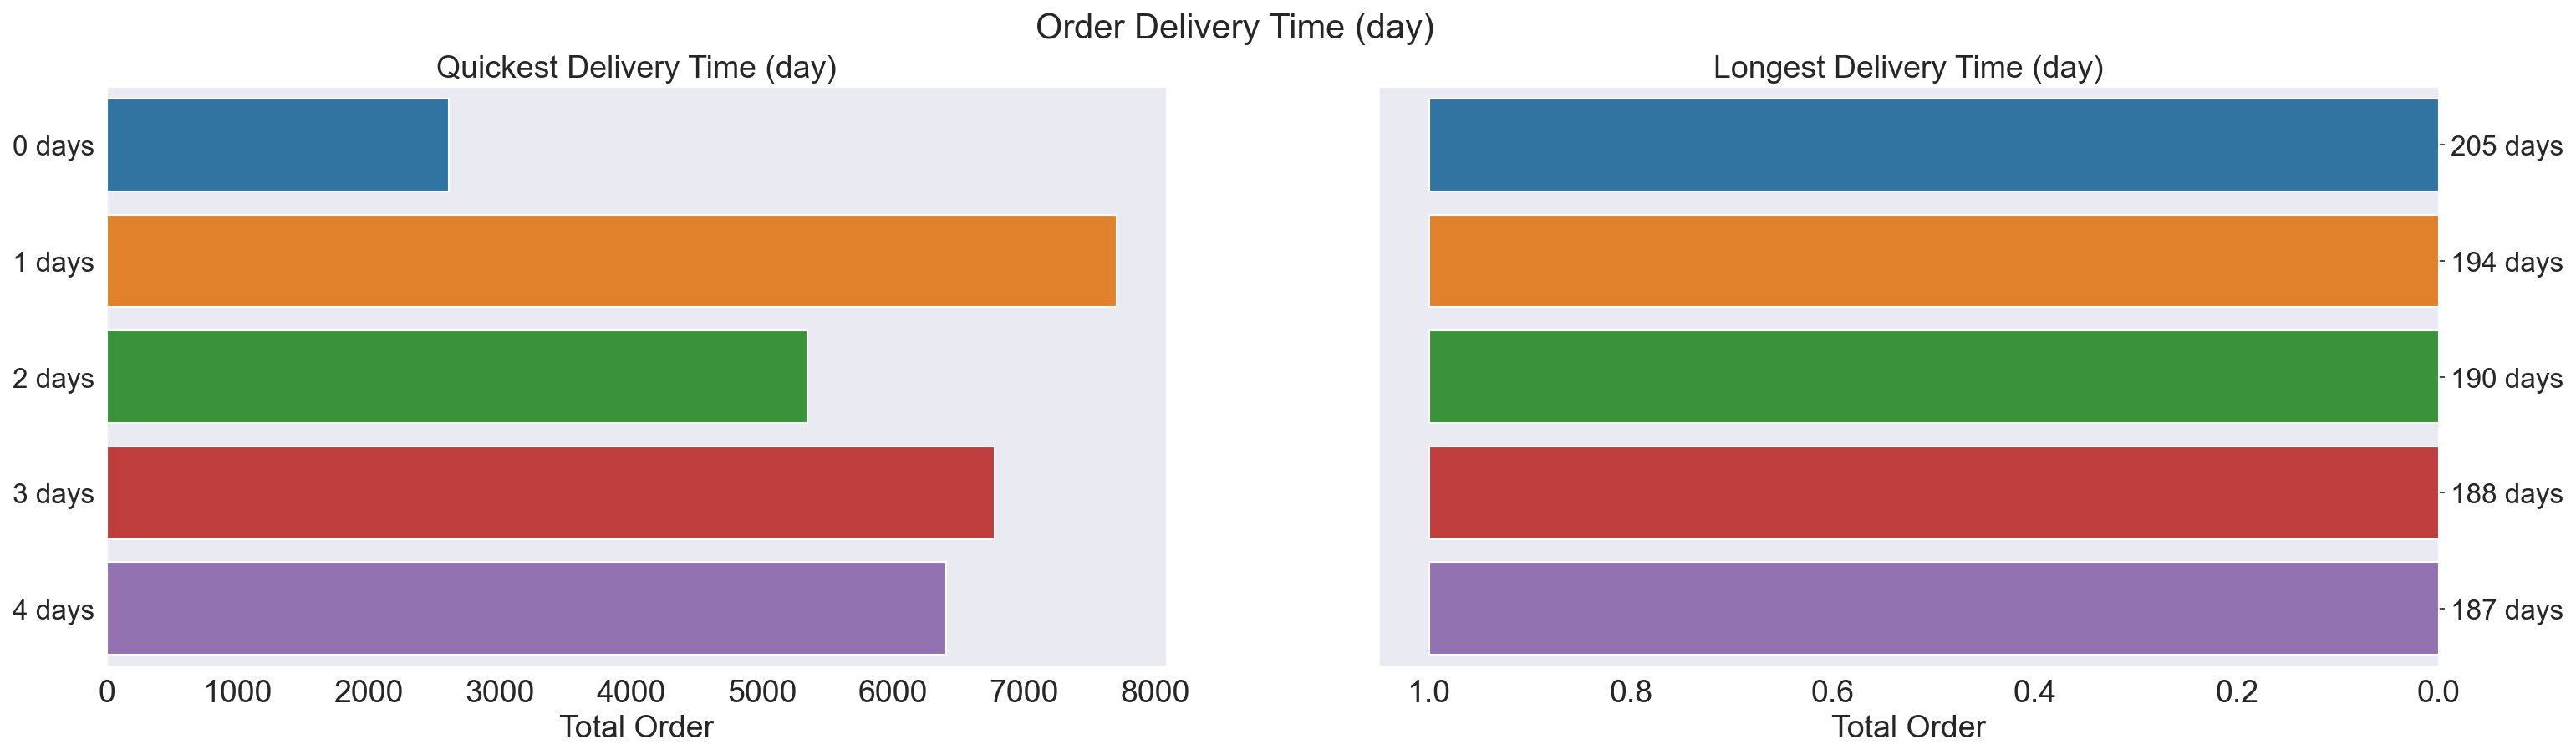

In [279]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6), dpi=150)

sns.barplot(x="order_id", y="label", data=delivery_time.head(), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Order", fontsize=18)
ax[0].set_title("Quickest Delivery Time (day)", loc="center", fontsize=18)
ax[0].tick_params(axis="y", labelsize=16)
ax[0].tick_params(axis="x", labelsize=18)

sns.barplot(
    x="order_id",
    y="label",
    data=delivery_time.sort_values(by="orders_delivery_time", ascending=False).head(),
    ax=ax[1],
)
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Order", fontsize=18)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Longest Delivery Time (day)", loc="center", fontsize=18)
ax[1].tick_params(axis="y", labelsize=16)
ax[1].tick_params(axis="x", labelsize=18)

plt.suptitle("Order Delivery Time (day)", fontsize=20)

### Pertanyaan 7: Berapa lama review customer dibalas oleh seller ?


### Pertanyaan 8: Pada hari dan bulan apakah order paling banyak dan paling sedikit dilakukan ?


### Pertanyaan 9: Tipe pembayaran apa yang paling banyak digunakan customer ?


### Pertanyaan 10: Bagaimanakah demografi customer ?


### Pertanyaan 11: Bagaimanakah demografi seller ?


## Conclusion


-   Conclution pertanyaan 1
-   Conclution pertanyaan 2
